<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [10]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values


In [14]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [15]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


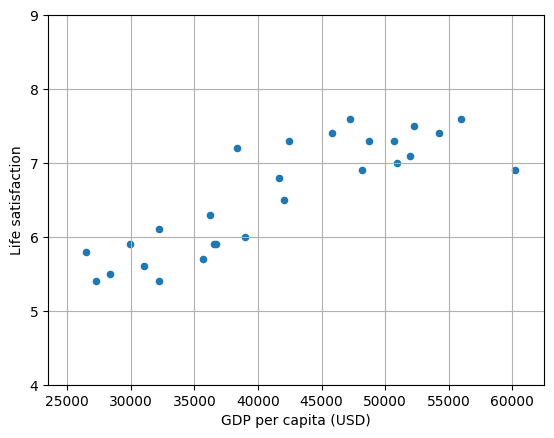

In [11]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [12]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression()

In [17]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


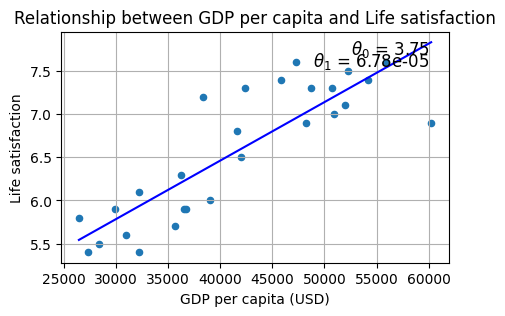

In [33]:
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x="GDP per capita (USD)", y="Life satisfaction")

X = np.linspace(lifesat["GDP per capita (USD)"].min(), lifesat["GDP per capita (USD)"].max(), 1000)
Y = t0 + t1 * X
plt.plot(X, Y, "b")
plt.text(0.95, 0.9, f"$\\theta_0$ = {t0:.2f}", transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.text(0.95, 0.85, f"$\\theta_1$ = {t1:.2e}", transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Relationship between GDP per capita and Life satisfaction")
plt.show()


In [34]:
# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new))

[[6.30165767]]


### Replacing the Linear Regression model with k-Nearest Neighbors regression

In [42]:
from sklearn.neighbors import KNeighborsRegressor
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [48]:
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)

# Select a k-Nearest Neighbors regression model
model1 = KNeighborsRegressor(n_neighbors=3)
# Train the model
model1.fit(X, y)

# Make a prediction for Cyprus
print(model1.predict(X_new))

[[6.33333333]]
